In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the .pkl file
file_path = 'smart_app_data.pkl'
df = pd.read_pickle(file_path)

In [74]:
# Retrieve unique machines and KPIs from the DataFrame
machines = df['name'].unique().tolist()

print("All machines are: ")
print(machines)

kpis = df['kpi'].unique().tolist()

print("All KPIs are: ")
print(kpis)

# Ensure 'time' column is in datetime format and sort by time
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(by='time')
# Extract the month from the 'time' column (ignore the year)
df['month'] = df['time'].dt.month
months = df['time'].dt.month.unique().tolist()
print("Present months: ")
print(months)

# Define aggregation options and corresponding colors
aggregations = ['sum', 'avg', 'min', 'max']
colors = ['b', 'g', 'r', 'purple']  # Define colors for each aggregation


All machines are: 
['Large Capacity Cutting Machine 1', 'Riveting Machine', 'Medium Capacity Cutting Machine 1', 'Laser Cutter', 'Large Capacity Cutting Machine 2', 'Medium Capacity Cutting Machine 2', 'Testing Machine 1', 'Testing Machine 2', 'Low Capacity Cutting Machine 1', 'Medium Capacity Cutting Machine 3', 'Assembly Machine 1', 'Laser Welding Machine 1', 'Assembly Machine 2', 'Assembly Machine 3', 'Laser Welding Machine 2', 'Testing Machine 3']
All KPIs are: 
['working_time', 'idle_time', 'offline_time', 'consumption', 'power', 'consumption_working', 'consumption_idle', 'cost', 'cost_working', 'cost_idle', 'cycles', 'good_cycles', 'bad_cycles', 'average_cycle_time']
Present months: 
[3, 4, 5, 6, 7, 8, 9, 10]


Some notes:

We have min, avg, max and sum. The min max can gave us information about the range and some approximation of the std deviation of data (using the rule of thumb max-min/4). The point where the average is placed inside the min max can give us some insights about the skewness of the data or indicate possible presence of outliers.

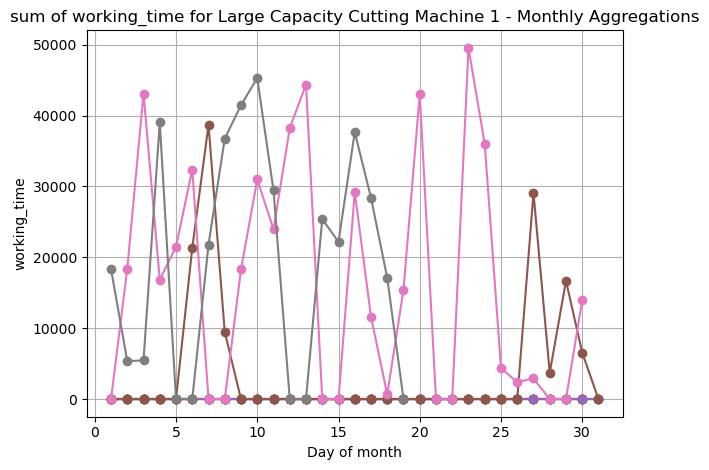

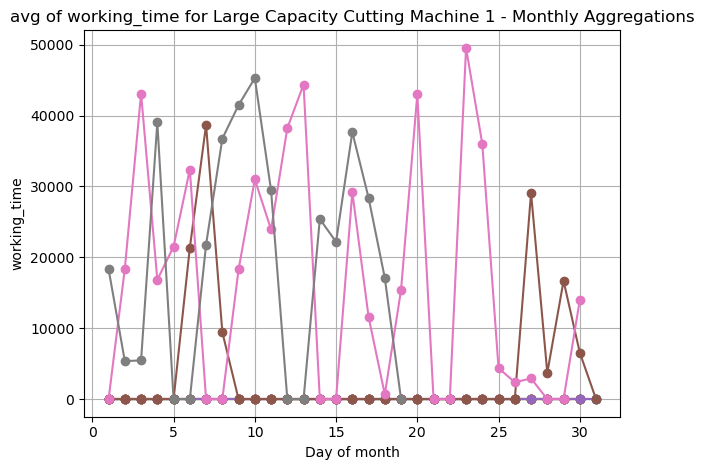

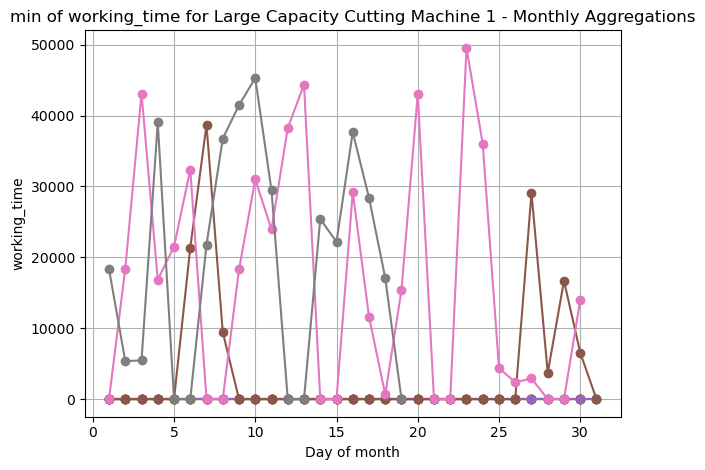

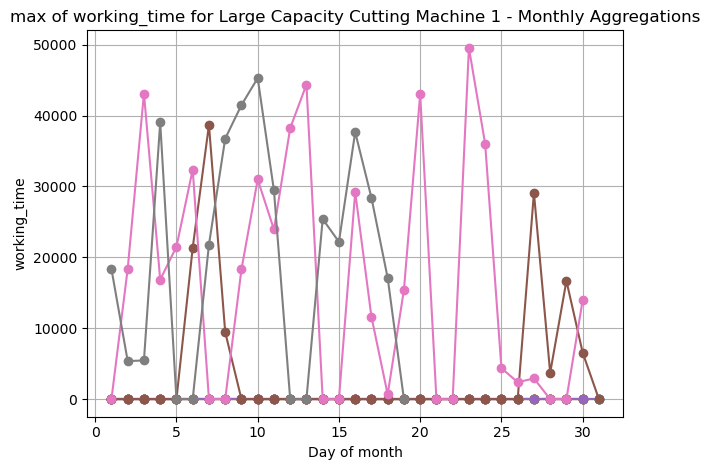

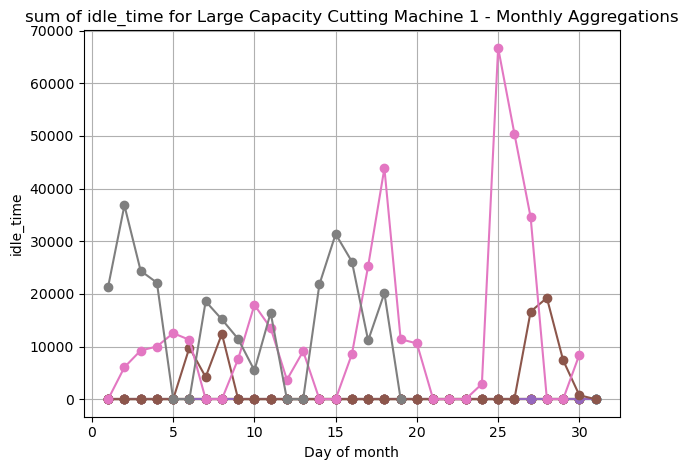

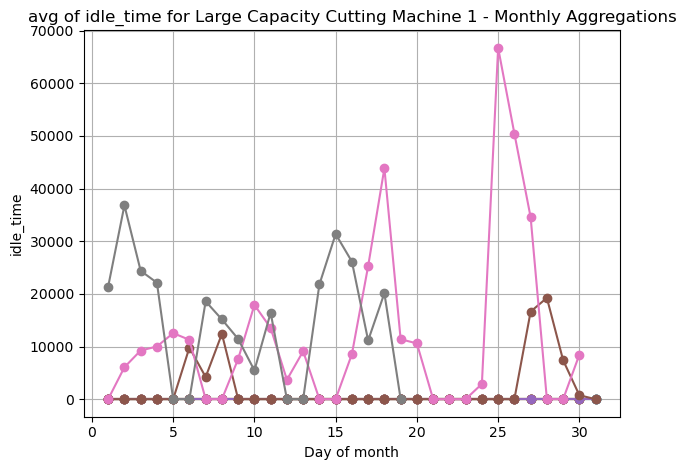

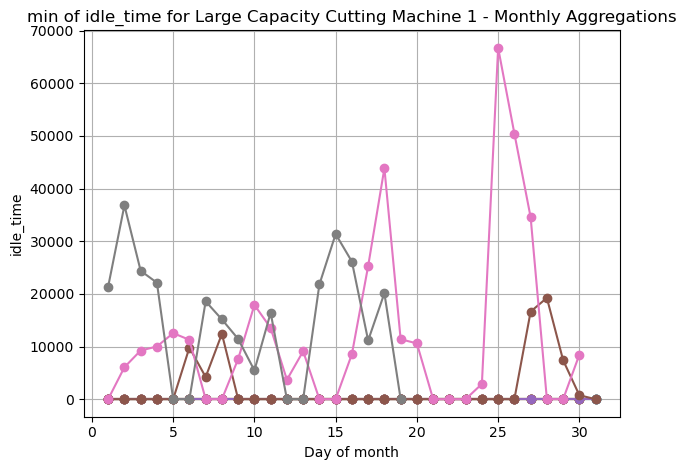

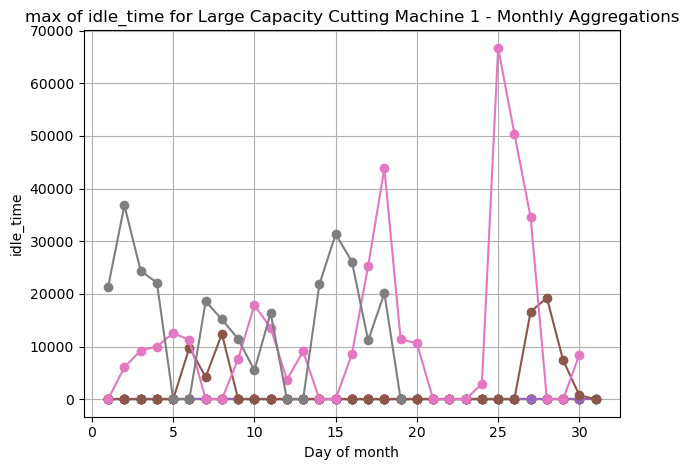

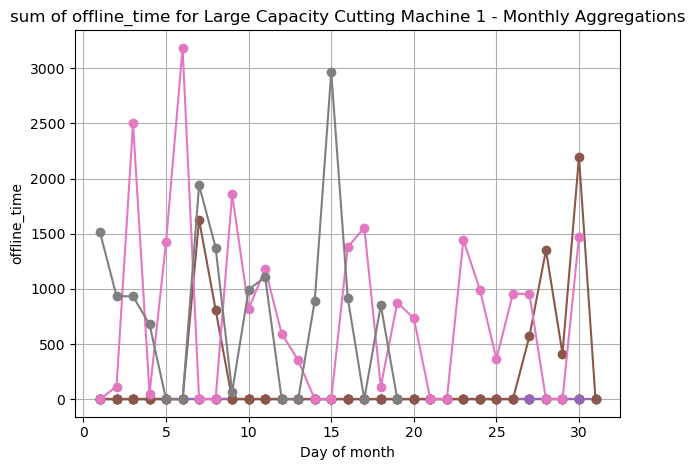

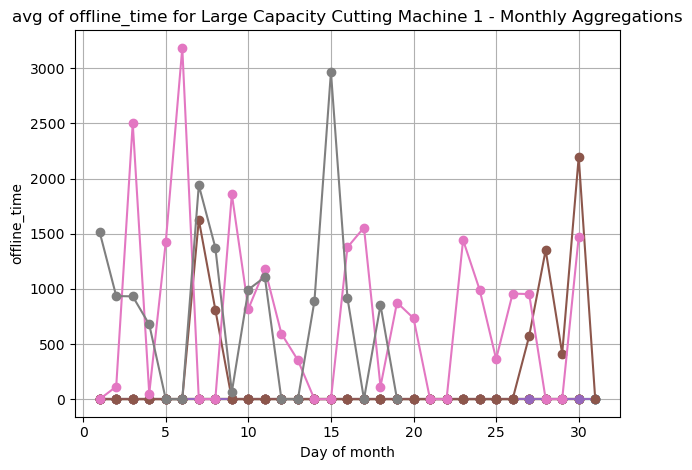

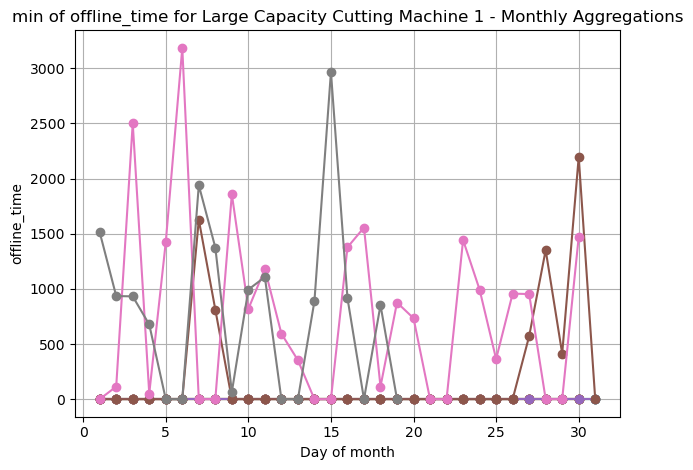

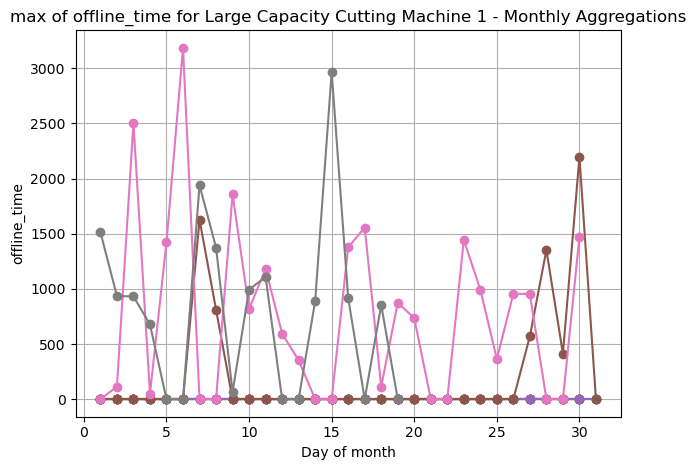

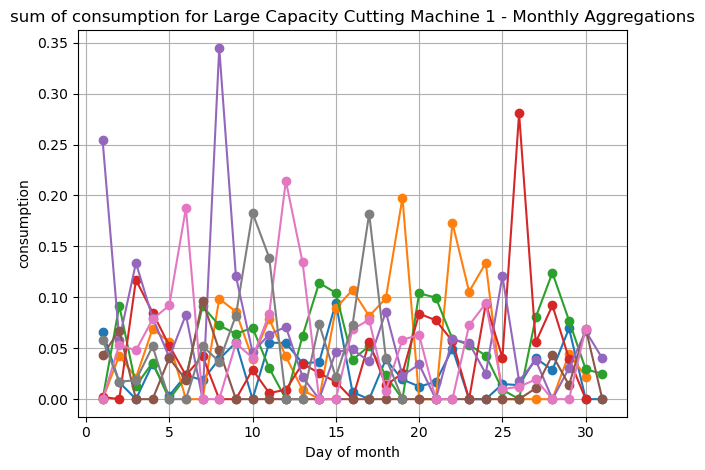

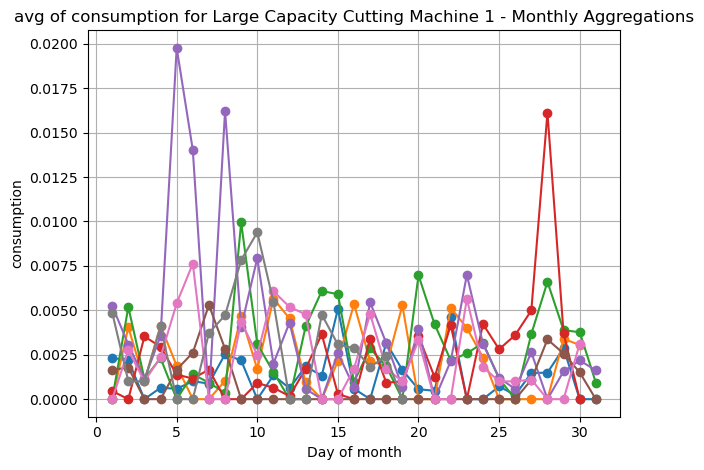

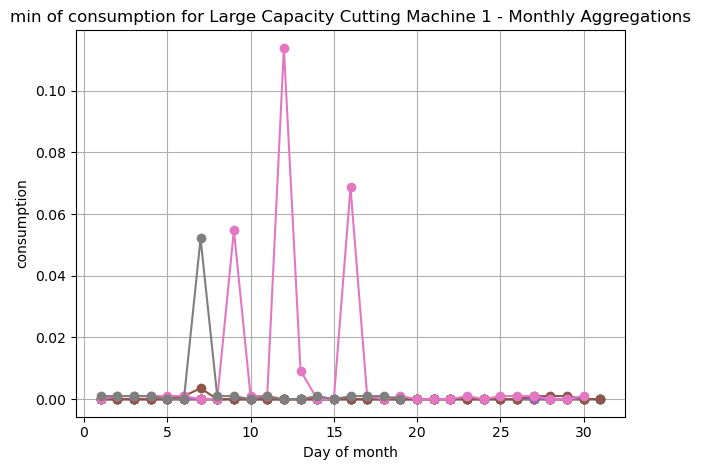

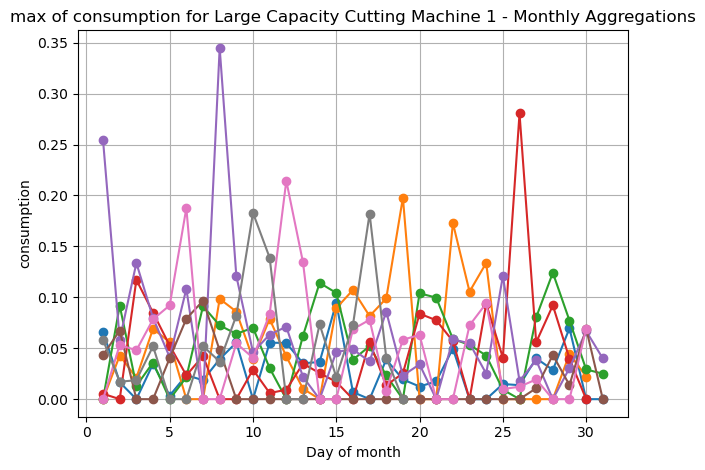

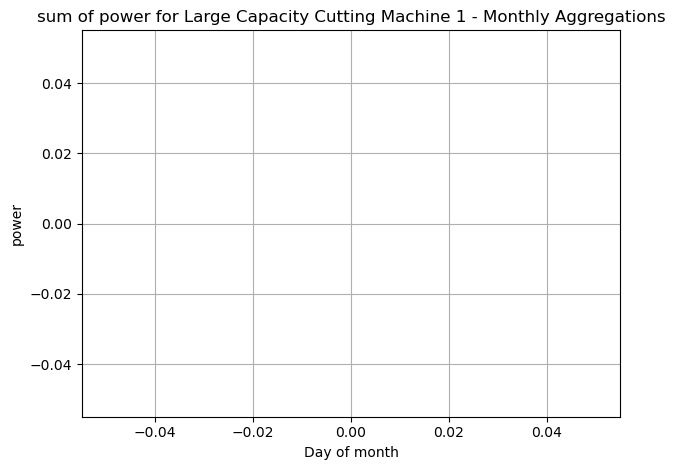

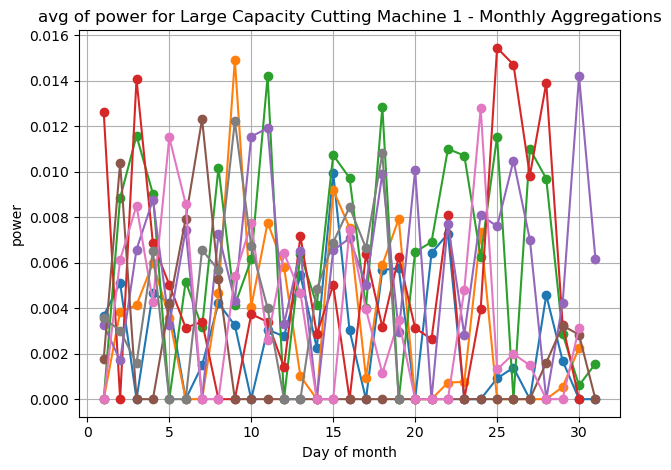

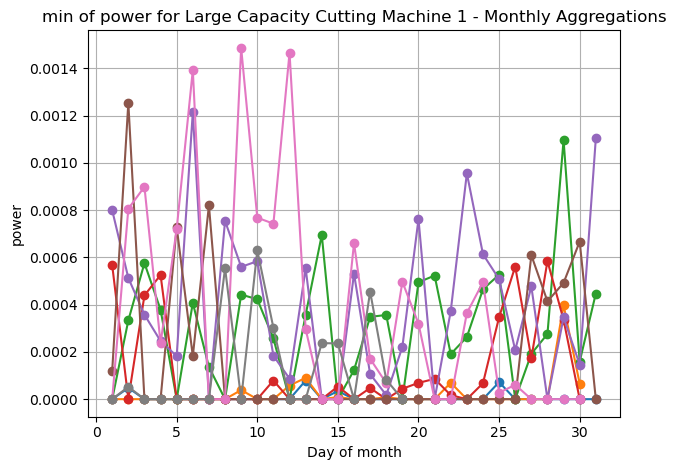

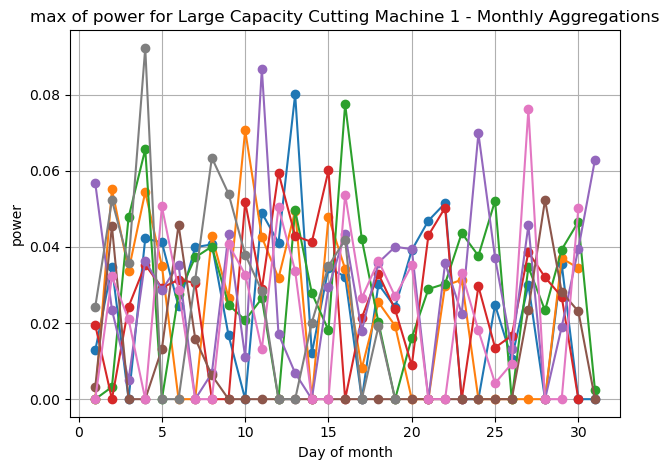

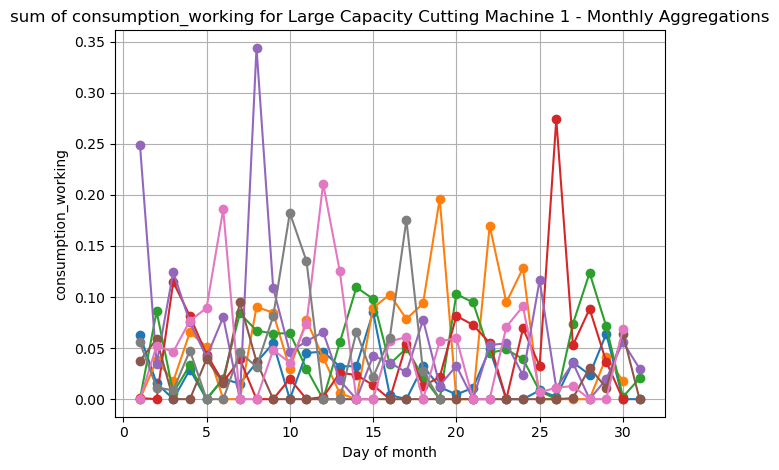

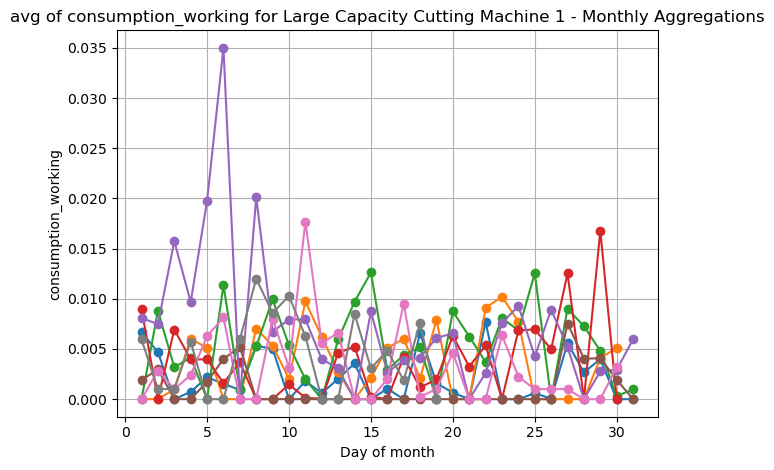

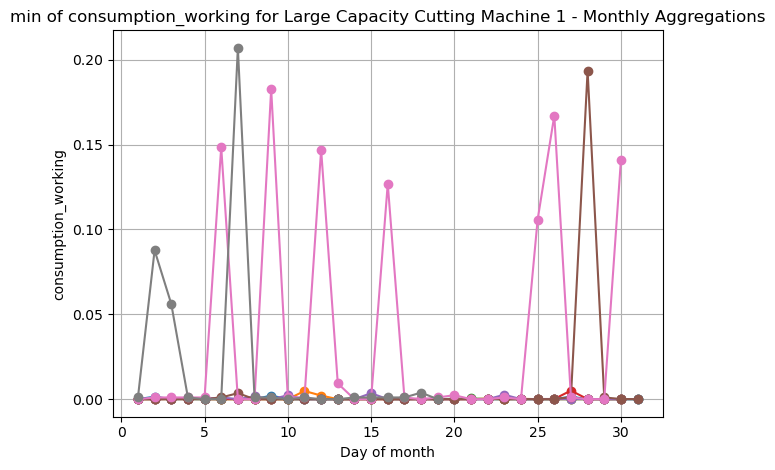

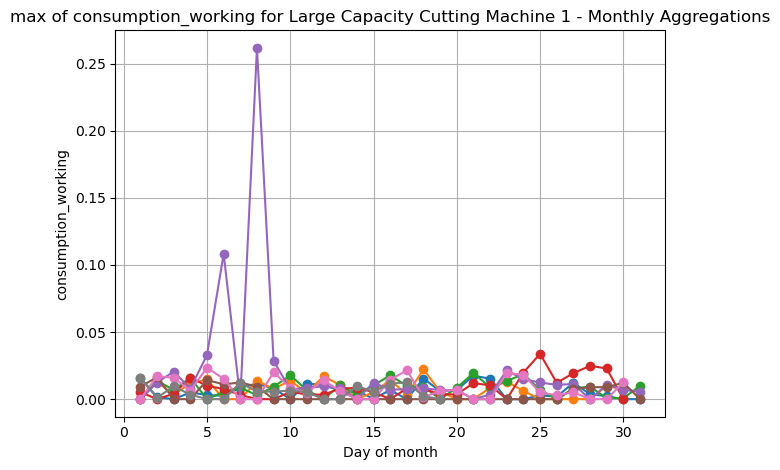

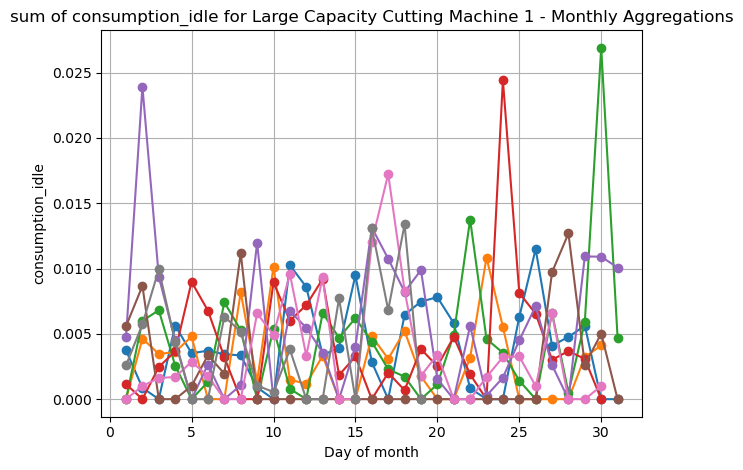

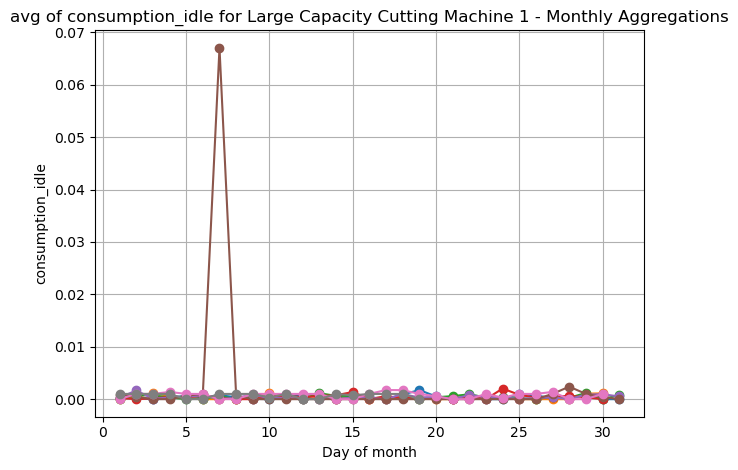

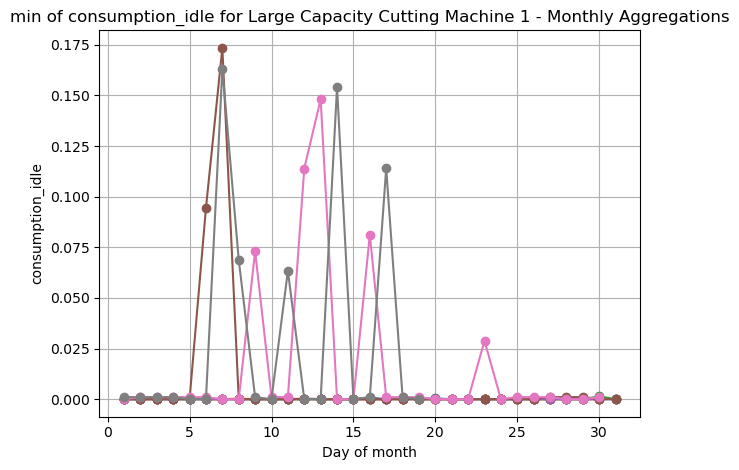

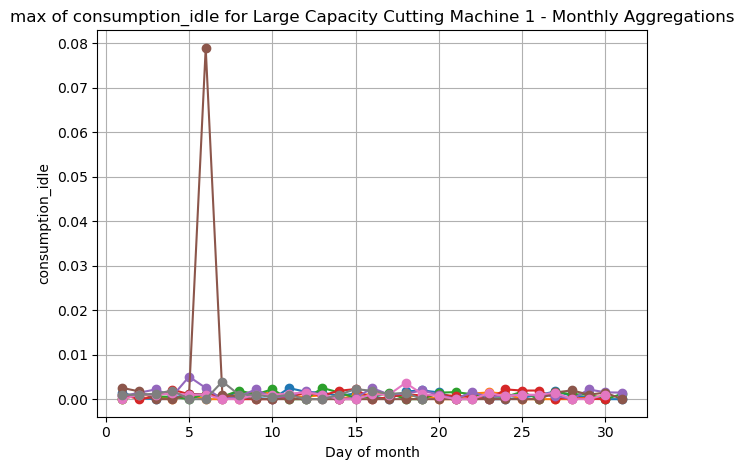

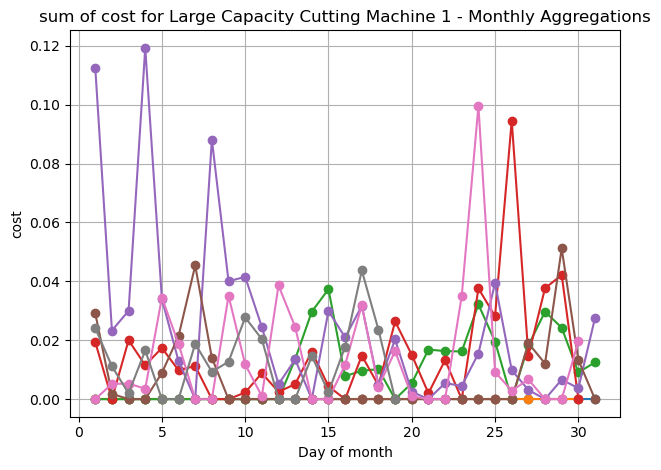

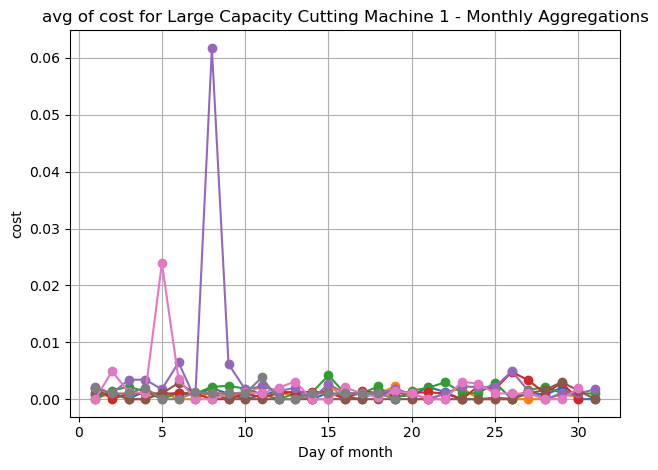

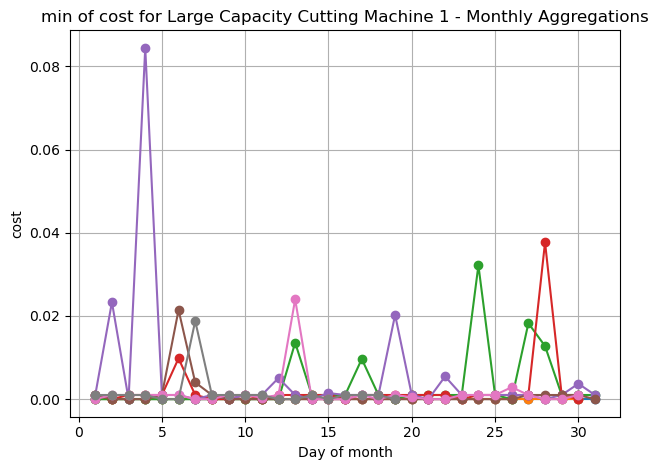

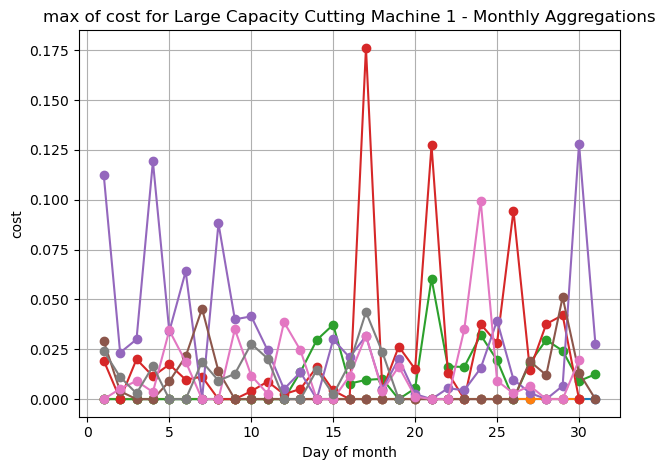

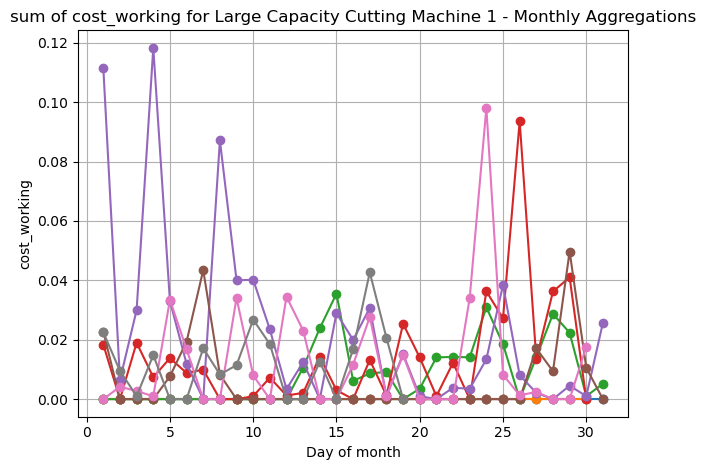

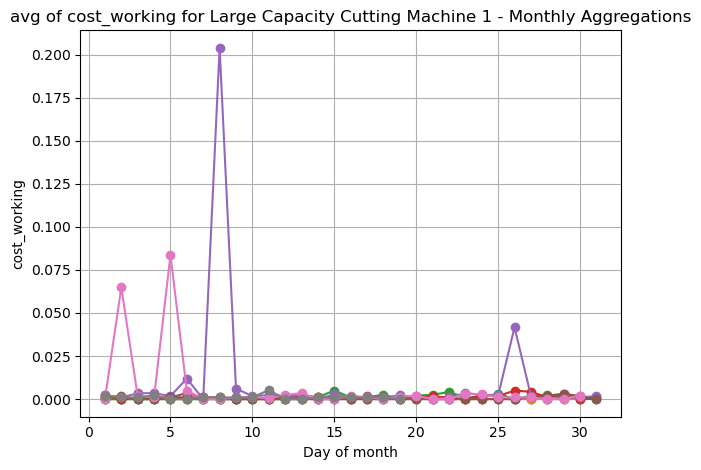

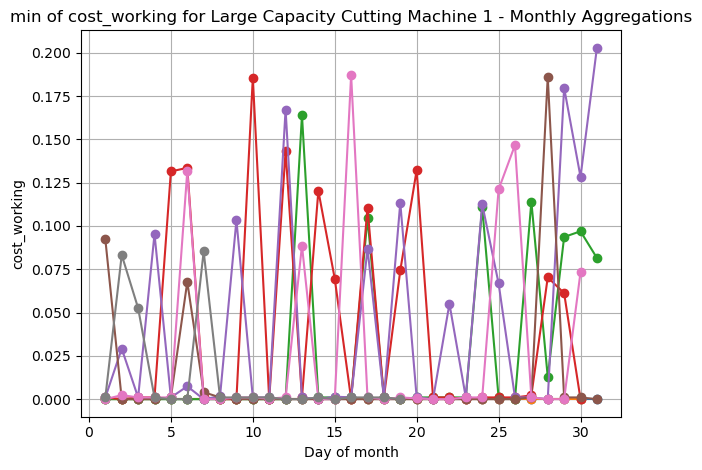

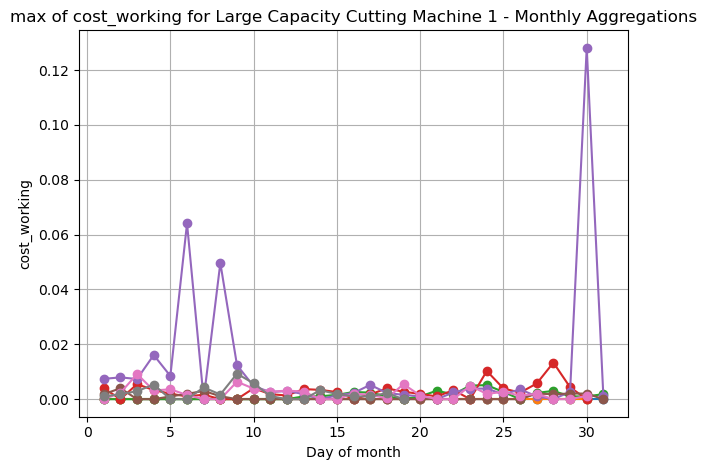

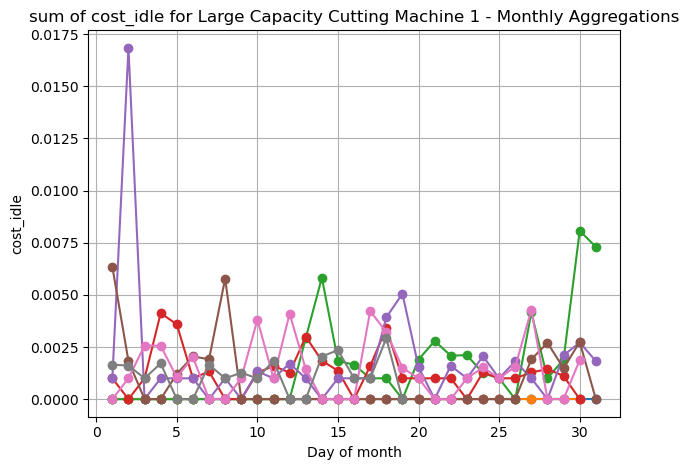

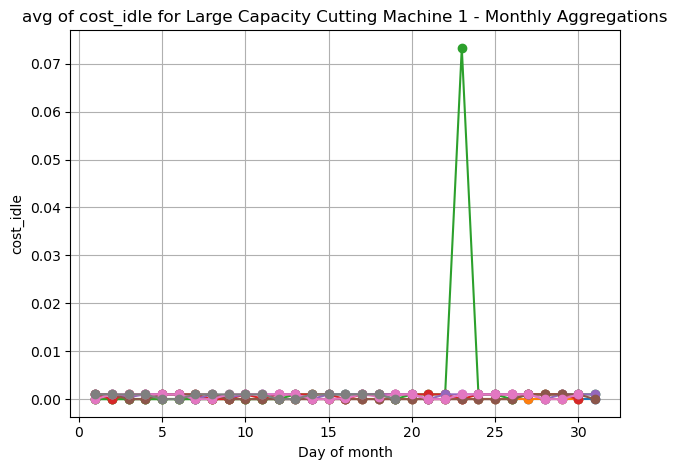

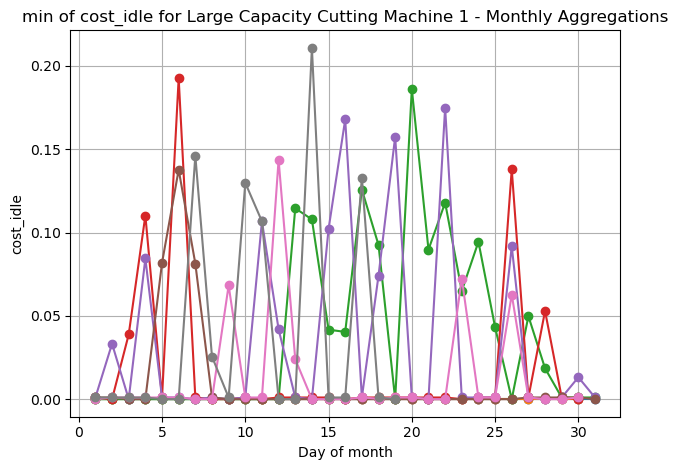

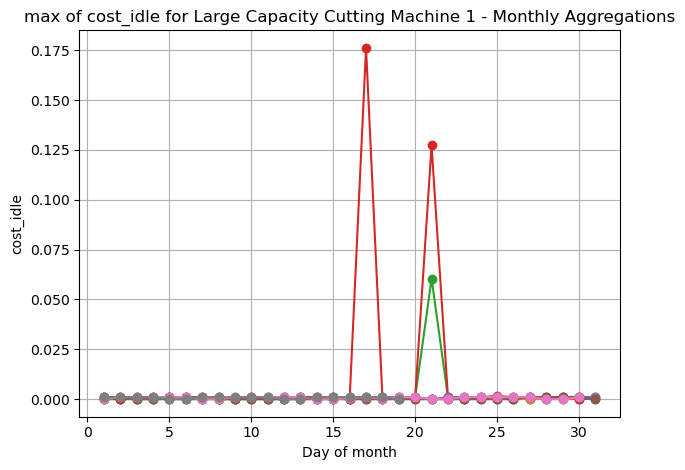

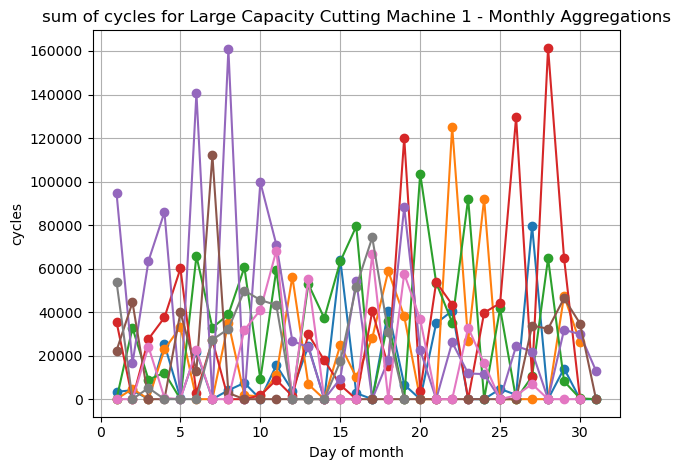

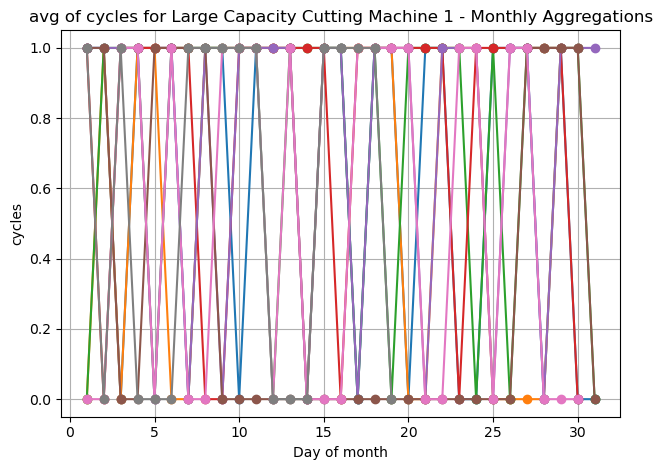

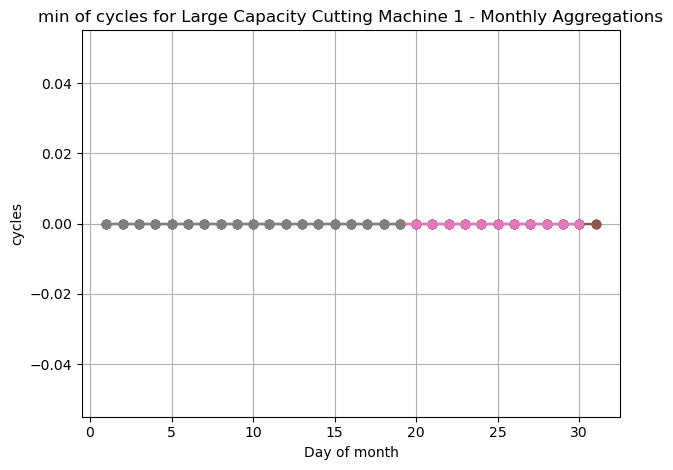

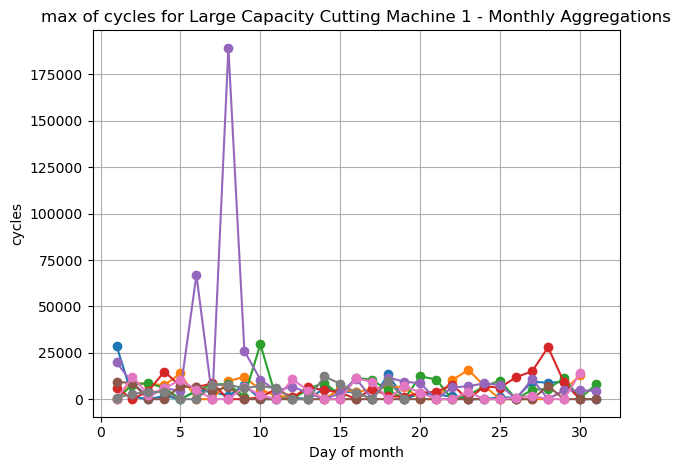

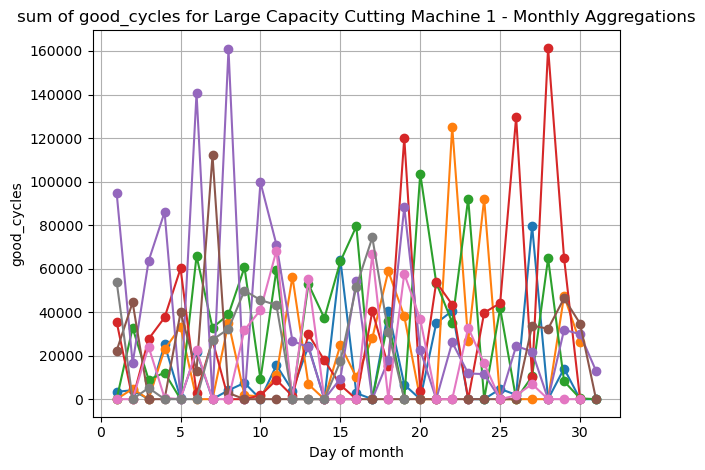

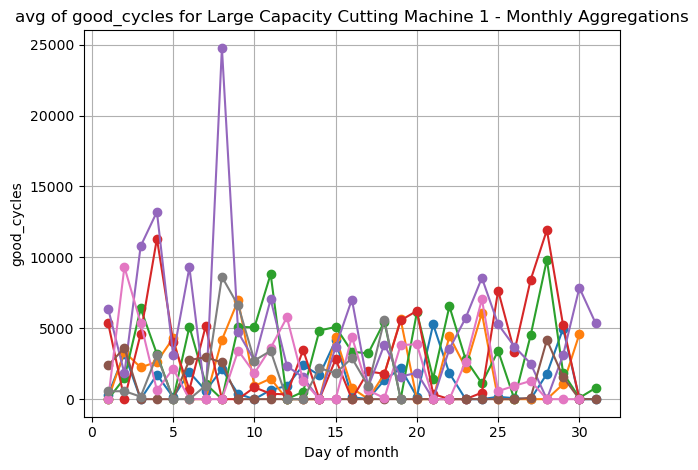

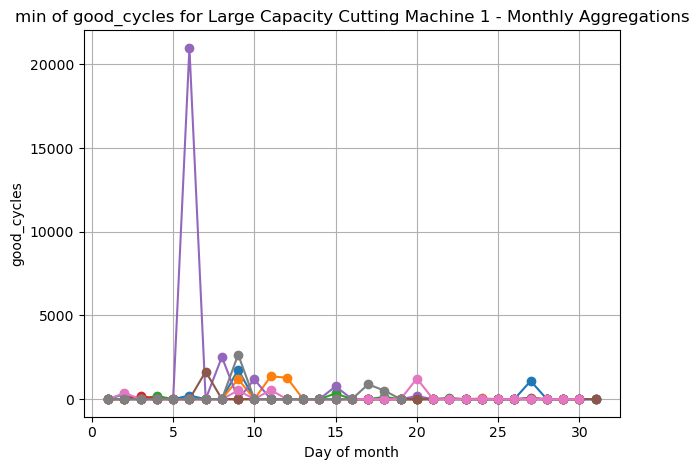

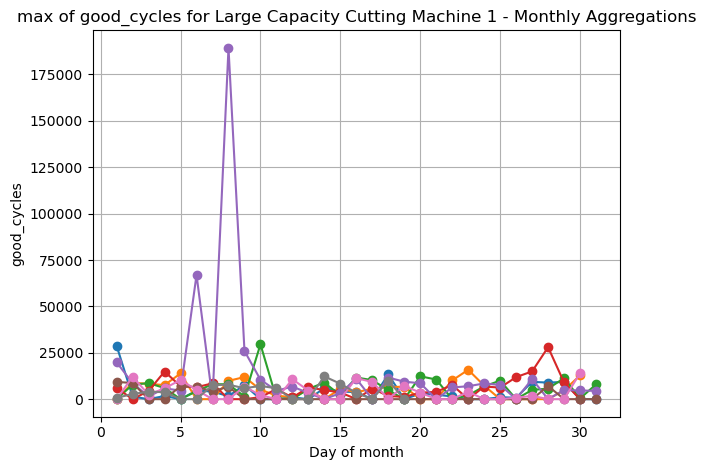

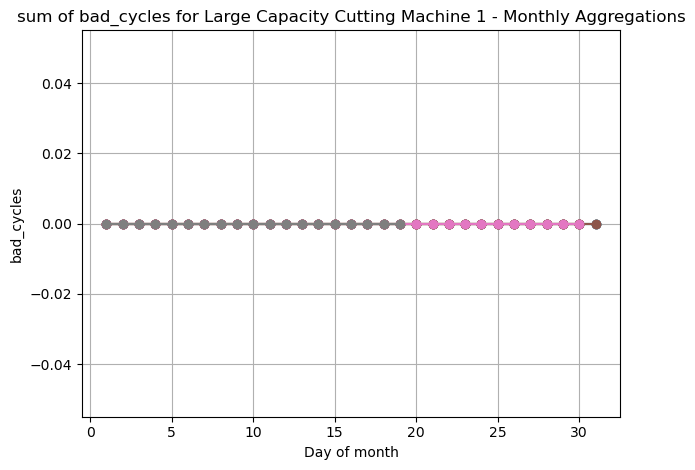

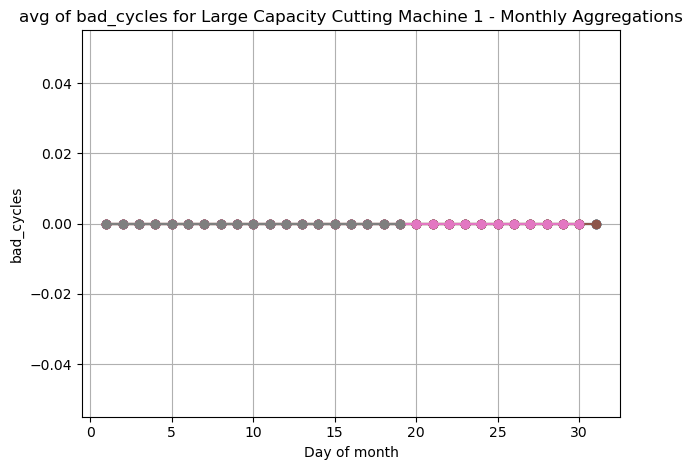

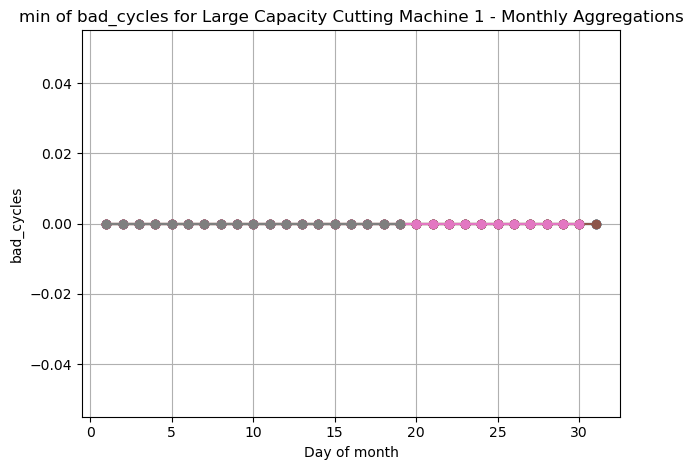

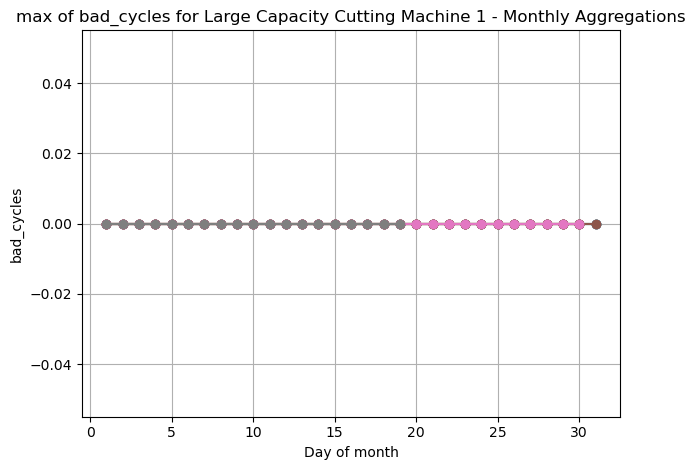

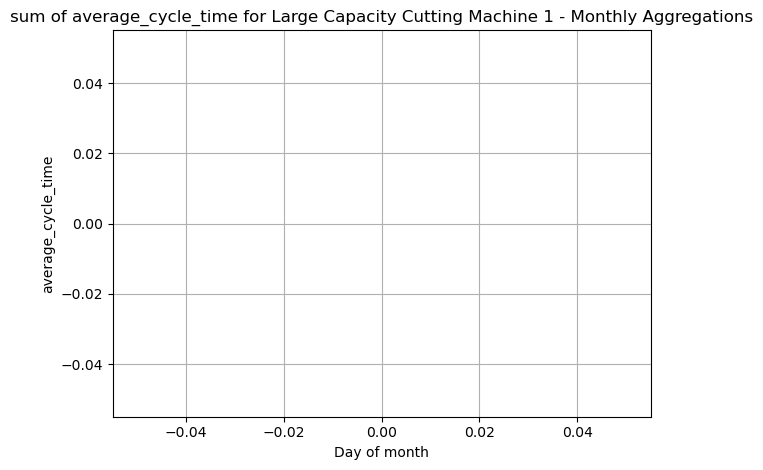

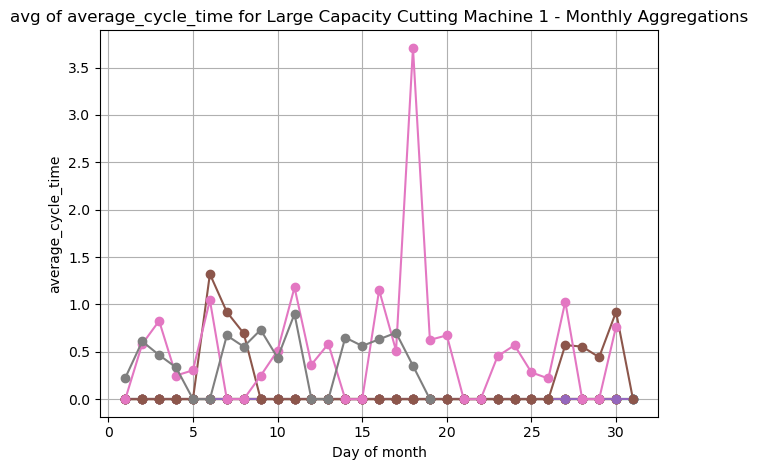

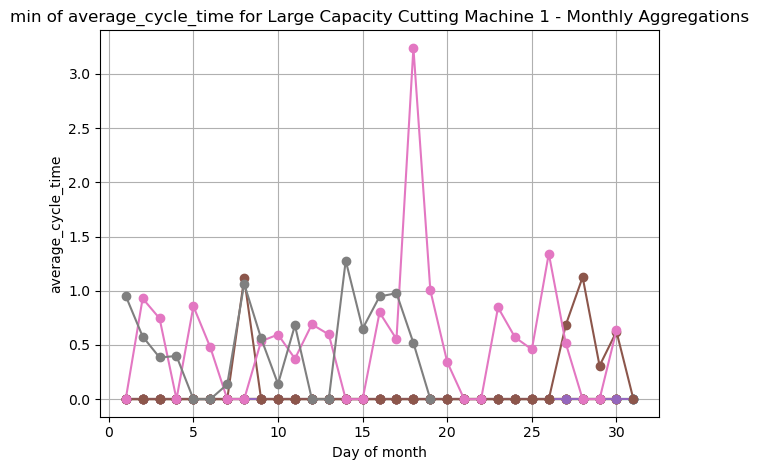

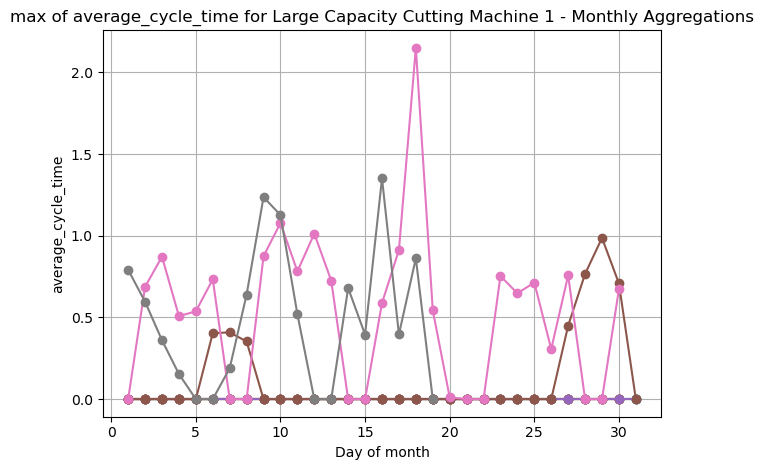

In [85]:

# Loop over each machine and each KPI
machine = machines[0]  # Adjust this as needed to iterate over different machines
for kpi in kpis:
    for value in aggregations:
        for month in months:

            # Filter the DataFrame for the specific machine, KPI, and month
            filtered_df = df[(df['name'] == machine) & (df['kpi'] == kpi) & (df['month'] == month)]
            
            # Plot each aggregation on the same plot with different colors
            # We're plotting for all months (but filtering by month in each iteration)
            plt.plot(filtered_df['time'].dt.day, filtered_df[value], marker='o', linestyle='-')

        # Set titles and labels for the plot
        plt.title(f'{value} of {kpi} for {machine} - Monthly Aggregations')
        plt.xlabel('Day of month')
        plt.ylabel(kpi)
        #plt.legend(title='Aggregation', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
        plt.grid(True)

        # Display the plot once all months are plotted
        plt.tight_layout()  # Adjust layout to prevent clipping
        plt.show()

